# Discrete Logs, Diffie-Hellman Key Exchange, and the ElGamal Cryptosystem

(sec-dl)=
## The Discrete Log Problem

### Logarithms

Remember how logarithms work: if you are asked was is $\log_{\color{red} 2}({\color{blue} 4})$, what you are being asked is *what power of ${\color{red} 2}$ gives us ${\color{blue} 4}$*?   In other words, the answer is the value of $x$ such that ${\color{red} 2}^x = {\color{blue} 4}$.  In this case, the answer is easy: since ${\color{red} 2}^2 = {\color{blue} 4}$, we have that $\boxed{\log_2(4) = 2}$.

That is essentially all that there is to logs.  On the other hand, it clearly is harder than computing powers.  If I asked you what is $5^3$, you simply compute it directly: $5^3 = 5 \cdot 5 \cdot 5 = 125$.  But if I ask you what is $\log_5(125)$, you do not compute it directly: you solve $5^x = 125$ for $x$.  (And this solution is $\log_5(125)$, which is $3$ in this case.)

This is similar to how to compute square roots.  To compute, say, $\sqrt{9}$ we do not do (in general) perform a direct computation, but solve the equation $x^2 = 9$, for which the *non-negative* solution will be our answer.

### Discrete Logs

Now suppose we have some elements $a, g \in \mathbb{Z}/m\mathbb{Z}$.  One might ask if there is some power $k$ such that $a = g^k$.  Note that is the same question that the logarithm asks: what is the power of $g$ that gives us $a$.  Hence, if $g^k = a$, we write, similar to real numbers, that $k = \log_g(a)$.

For real numbers we know that if the base $b$ of the log is positive and different from $1$, and $a$ is positive, then $\log_b(a)$ exists, meaning, there is indeed some *unique* power of $b$ that gives $a$.  This questions is a bit harder to answer for logs in $\mathbb{Z}/m\mathbb{Z}$.  For instance, in $\mathbb{Z}/8\mathbb{Z}$, no power of $2$ can give you $3$.  There are few ways to check that this is indeed true, but let's do it computationally with Sage.

To do so, we can simply start computing the powers $2^0$, $2^1$, $2^2$, etc., in $\mathbb{Z}/8\mathbb{Z}$. First, how many times do we have to compute these powers?  In other words, is there a way to know when we can stop computing these and be sure that no positive integer power will *ever* give us $3$?

If we get a repetition, then the values of the powers will start repeating themselves (in the same order). After all, if $2^k = 2^l$, then 
```{math}
2^{k+r} = 2^r \cdot 2^k = 2^r \cdot 2^l = 2^{l+r},
```
for any positive integer $r$.

So, if we get a repetition before getting $3$, we will *never* get $3$.

So, let's check:

In [1]:
Mod(2, 8)^2

4

In [2]:
Mod(2, 8)^3

0

In [3]:
Mod(2, 8)^4

0

Ah, since we got $0$ again, we know that from now on you we will only get zeros, and we can stop.  No power of $2$ will ever give us $3$ in $\mathbb{Z}/8\mathbb{Z}$.  The powers can only give us $1$ (power $0$), $2$ (power $1$), $4$ (power $2$), and $0$ (any power $3$ or larger).  So, in this case we say that $\log_2(3)$ (in $\mathbb{Z}/8\mathbb{Z}$) *does not exist*.

As another example, we can see, still in $\mathbb{Z}/8\mathbb{Z}$, that $\log_3(5)$ does not exist, i.e., there is no power of $3$ that gives $5$:

In [4]:
Mod(3, 8)^2

1

Ah, we already have a repetition since $3^0 = 1$, $3^1=3$, and $3^2 = 1$.  So, we know that the powers will just repeat, giving $1$, $3$, $1$, $3$, ...  In fact, if $n$ is even, we get $3^n = 1$, and if odd we get $3^n = 3$, due to this pattern.

On the other hand, sometimes the discrete log does exist!  A simple one, still in $\mathbb{Z}/8\mathbb{Z}$, is $\log_3(1)$: we have that $3^0 = 1$, so $\log_3(1) = 0$.

But wait!  We also have that $3^2 = 1$.  In fact, any positive *even* integer power of $3$ would give $1$, as we've just seen.  So, which one of these powers is $\log_3(1)$?  Let's postpone the answer for a little while, but we will come back to this issue later.

#### Terminology

We call a log in $\mathbb{Z}/m\mathbb{Z}$ a *discrete log*, as the result is a subset of the *integers*, not the real numbers.  The integers are called [*discrete*](https://en.wikipedia.org/wiki/Discrete_mathematics_) because its separated from each other by gaps in the real line.  Conversely, the real numbers are [*continuous*](https://en.wikipedia.org/wiki/List_of_continuity-related_mathematical_topics), since there are not gaps between real numbers (in the real line) that is not filled by real numbers.

More generally, a discrete log is any kind of log (meaning, situations where we are asking for powers) where the results are integers.  We will mostly work for discrete logs in $\mathbb{Z}/m\mathbb{Z}$, although later we will talk about discrete logs in elliptic curves.

#### Properties

The discrete log has similar properties to the regular log:

:::{prf:property} Discrete Log Properties
:label: pr-dl


1) If $\log_g(a)$ and $\log_g(b)$ both exist, then $\log_g(ab)$ also exists and $\boxed{\log_g(ab) = \log_g(a) + \log_g(b)}$.

2) If $\log_g(a)$ exists and $k$ is a positive integer, then $\log_g(a^k)$ also exists and $\boxed{\log_g(a^k) = k \cdot \log_g(a)}$.
:::

### Computing the Discrete Log

Again, when trying to compute a discrete log, we are not sure in principle, if it exists or not.  But, there is one case when are sure that it does.  If $g$ is a *primitive root* of $\mathbb{Z}/p\mathbb{Z}$, where $p$ is prime, and $a$ is a *unit*, then we know that $\log_g(a)$ exists, since every unit is a power of $g$.

Moreover, in this case, the question of how we properly define the discrete log, since multiple powers of $g$ can give $a$, is to think of the exponent, and so the values of the discrete log, in $\mathbb{Z}/(p-1)\mathbb{Z}$.  This works, since, as we've seen before, we have that $|g| = \varphi(p) = p-1$ and hence we can consider the exponents of $g$ modulo $p-1$.  (More generally, if $g$ is not primitive root, we consider exponents, and so the values of the discrete log, in $\mathbb{Z}/|g|\mathbb{Z}$.)

Note that with the usual log (with real numbers), we have numerical methods that allow us to compute these logs fairly quickly.  But discrete log, although similar in concept, is very different.  If you look at consecutive powers of a single primitive root $g$ in $\mathbb{Z}/p\mathbb{Z}$, they seem to just bounce randomly, making it difficult to predict the value, and hence difficult to compute discrete logs.

For instance, in $\mathbb{Z}/31\mathbb{Z}$, we have that $17$ is a primitive root.  Here are the powers of $17$, in order:

:::{table} Powers of $17$ in $\mathbb{Z}/31\mathbb{Z}$
:widths: grid

| $k$ |  $17^k$ |   | $k$ | $17^k$ |   | $k$ | $17^k$ |
|----:|:-------|---|----:|:-------|---|----:|:-------|
|   0 | 1      |   |  10 | 25     |   |  20 | 5      |
|   1 | 17     |   |  11 | 22     |   |  21 | 23     |
|   2 | 10     |   |  12 | 2      |   |  22 | 19     |
|   3 | 15     |   |  13 | 3      |   |  23 | 13     |
|   4 | 7      |   |  14 | 20     |   |  24 | 4      |
|   5 | 26     |   |  15 | 30     |   |  25 | 6      |
|   6 | 8      |   |  16 | 14     |   |  26 | 9      |
|   7 | 12     |   |  17 | 21     |   |  27 | 29     |
|   8 | 18     |   |  18 | 16     |   |  28 | 28     |
|   9 | 27     |   |  19 | 24     |   |  29 | 11     |
:::

As you can see, the powers do not seem to follow any pattern.

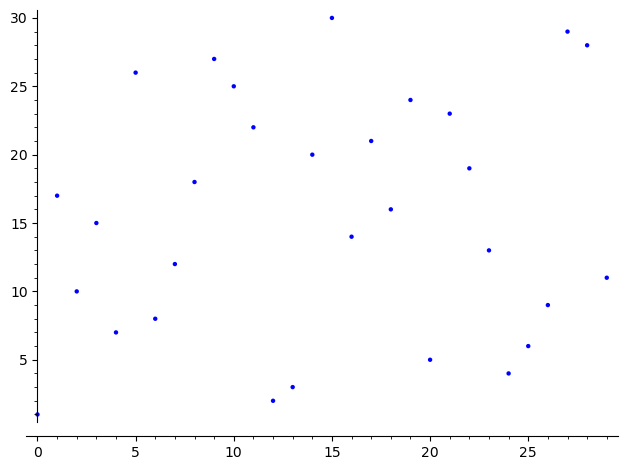

In [5]:
list_plot([power_mod(17, x, 31) for x in range(30)])

Therefore, at this point the only method we see to compute the discrete log is *brute force*: to compute $\log_g(a)$, we start computing powers of $g$, i.e., $g^0$, $g^1$, $g^2$, etc., until we either get $a$ or get a repeated power, in which case the log does not exist.  This make this computation extremely time consuming if $|g|$ is a really large number, and as we will soon see, we can use this difficulty to create a cryptosystem that is difficult to break.

:::{prf:definition} The Discrete Log Problem (DLP)
:label: def-dlp

We call the (computationally intensive) problem of computing a discrete log $\log_g(a)$, i.e., finding a power $x$ (in $\mathbb{Z}/|g|\mathbb{Z}$) such that $g^x = a$ in $\mathbb{Z}/m\mathbb{Z}$, the *discrete log problem (DLP)*.
:::

## Cryptosystems

A [Cryptosystem](https://en.wikipedia.org/wiki/Cryptosystem) is a set of algorithms used in the transmission of private messages.

As we've mentioned before, the usual scenario is when Bob wants to send Alice some secret message so that even if their enemy Eve intercepts the message, she will not be able to read its content.

This means that Bob needs a way to *encode* the message and Alice needs a way to decode Bob's encoded message, and the decoding process must difficult enough that, without some secret knowledge, Eve should not be able to discover the decoding method.

Formally, we write that if $m$ is the plain/unencrypted message, then Bob uses some *encoding key*, say $e$, to create a function $E_e$, called the *encryption function*, which depends on the key $e$, so that $E_e(m)$ produces the encrypted message.

Alice then uses a *decoding key* $d$ (which will depend on the encoding key $e$) to produce a *decryption function* $D_d$ that can recover an encrypted message, i.e., such that $D_d(E_e(m)) = m$.

In our example of the Caesar Cipher, the encryption key $e$ was the table that would permute the letters of the alphabet, and the encryption function would use the table $e$ to replace the letters.  The decoding key $d$ was the inverse table of $e$, and the decoding function would use this reversed table to replace the letters based on this new table $d$.

## Symmetric versus Asymmetric Cryptosystems

In our Caesar Cipher example, as mentioned before, knowledge of the encryption table/key $e$ would automatically tell Eve what the decryption key $d$ should be.  This is an example of what we call a [*symmetric cryptosystem*](https://en.wikipedia.org/wiki/Symmetric-key_algorithm): the same key allows for both encrypting and decrypting messages.

But again, this raises the problem of how will Alice and Bob exchange the encryption/decryption key.  A better method would be to have an *asymmetric cryptosystem*, i.e., one in which Alice can provide *publicly* an encoding key to Bob (or anyone else who might want to send her a message), but keep secret her decoding key, with the obvious assumption that is hard to obtain the decoding key from the publicly available decoding key.  In this situation the encoding key is called the *public-key* and the decoding key is called the *private key*.  For this reason, these asymmetric cryptosystems are also called [*public-key cryptosystems*](https://en.wikipedia.org/wiki/Public-key_cryptography).

Of course, the real question is how to create such a system.  Most of the naive methods one can come up with will be symmetric.  But before we do that, let's see if we can find a safe way to exchange a secret key for a symmetric cryptosystem.

(DH_key_exchange)=
## The Diffie-Hellman Key Exchange

If you have a symmetric cryptosystem, you are faced with the problem of sharing the encryption/decryption key.  [Whitfield Diffie](https://en.wikipedia.org/wiki/Whitfield_Diffie) and [Martin Hellman](https://en.wikipedia.org/wiki/Martin_Hellman) proposed in 1976 a clever method to do so, based on the discrete log problem (DLP).  Here is how it goes:

**The Diffie-Hellman Key Exchange:**

1) A trusted party publishes:
    - a large prime $p$ and
    - an element $g$ of $\mathbb{F}_p^{\times}$ of large *prime* order $q$.  (The order $q$ is also public.)
2) Alice chooses a *secret* integer $a$, and Bob chooses a *secret* integer $b$.
3) Alice computes $A = g^a$ and *publicly* sends the result $A$ to Bob.  (So, $A$ is known, but not the exponent $a$ to produce it.)  Similarly, Bob computes $B = g^b$ and *publicly* sends the result $B$ to Alice.
4) Alice computes $B^a$ and Bob computes $A^b$.  These values are equal and that is their **shared key**.

Note that $A^b = (g^a)^b = g^{ab}$ and $B^a = (g^b)^a = g^{ba} = g^{ab}$, and that's why $A^b = B^a$.  This element of $\mathbb{F}_p^{\times}$ is their shared key.

Eve, Alice and Bob's enemy, will know $p$, $g$, $q$, $A$, and $B$, since these are all public, but will not know $a$ and $b$.  Only Alice knows $a$ and only Bob knows $b$.  Now Alice and Bob can, somehow, use their shared key to produce they key for a symmetric cryptosystem.


:::{note}

The numbers involved are very large in general, so one would have to compute very large powers of $g$.  So, you can see how the [Fast Powering Algorithm](#fast_powering).
:::

We will discuss the security of this method [below](#sec:find_shared_key).

### Finding $q$ and $g$

How would one find the $g$, with large order $q$ in $\mathbb{F}_p^{\times}$?  Let's first think about its order, which we called $q$.  We want it to be as large as possible.  As we've seen in {prf:ref}`a previous proposition <pr-power_one>`, we know that $|g| = q \mid \varphi(p)=p-1$.  Since $p$ is odd, being a prime different from $2$, the largest that $q$ could be is if $p-1 = 2q$.  So, to find the *pair* $p$ and $q$, we look for a $p$ of the desired size, and check if $(p-1)/2$ is also prime.  If so, $q = (p-1)/2$ works.

We can do that relatively easy with Sage for primes of reasonable size:

In [6]:
%%time

# let's find a 64-bit prime
lower_bound = 2^63
upper_bound = 2^64 - 1

while True:
    p = random_prime(upper_bound, lbound=lower_bound)
    q = (p - 1) // 2
    if is_prime(q):
        break

print(f"We can take {p = } and {q = }.")

We can take p = 14141379442074030863 and q = 7070689721037015431.
CPU times: user 859 µs, sys: 0 ns, total: 859 µs
Wall time: 863 µs


Here is some details about the system used for this computation:

In [7]:
!inxi --system --cpu --memory

System:
  Host: dell7010 Kernel: 6.17.8-1-siduction-amd64 arch: x86_64 bits: 64
  Desktop: KDE Plasma v: 6.5.3 Distro: siduction 22.1.2 Masters_of_War -
    kde - (202303220911)
Memory:
  System RAM: total: 128 GiB available: 125.51 GiB used: 21.48 GiB (17.1%)
  Array-1: capacity: 128 GiB slots: 4 modules: 4 EC: None
  Device-1: DIMM1 type: DDR5 size: 32 GiB speed: spec: 4800 MT/s
    actual: 3600 MT/s
  Device-2: DIMM2 type: DDR5 size: 32 GiB speed: spec: 4800 MT/s
    actual: 3600 MT/s
  Device-3: DIMM3 type: DDR5 size: 32 GiB speed: spec: 4800 MT/s
    actual: 3600 MT/s
  Device-4: DIMM4 type: DDR5 size: 32 GiB speed: spec: 4800 MT/s
    actual: 3600 MT/s
CPU:
  Info: 24-core model: 13th Gen Intel Core i9-13900 bits: 64 type: MCP cache:
    L2: 32 MiB
  Speed (MHz): avg: 5300 min/max: 800/5300:5600:4200 cores: 1: 5300 2: 5300
    3: 5300 4: 5300 5: 5300 6: 5300 7: 5300 8: 5300 9: 5300 10: 5300 11: 5300
    12: 5300 13: 5300 14: 5300 15: 5300 16: 5300 17: 5300 18: 5300 19: 5300
    2

Now, how do we find $g$, and element of $\mathbb{F}_p^{\times}$ of order $q$?

If we take a random element of $a$ of $\mathbb{F}_p^{\times}$, we know that $|a| \mid p-1 = 2q$.  Since $q$ is prime, the only possible orders for $a$ are $1$ (and only the element $1$ of $\mathbb{F}_p^{\times}$ has order $1$), $2$ (and one can show that the only $-1 = p - 1$ has order $2$ in $\mathbb{F}_p^{\times}$), $q$, or $2q$.

Now, we can compute $a^2$.  If we get $1$, then $a$ is either $1$ or $p-1$, and we try a different random $a$.  But if $a^2 \neq 1$, then, either $|a| = q$ or $|a|=2q$.

If $|a|=q$, then, by the {prf:ref}`Order of a Power Proposition <pr-order_power>` from a previous chapter, we have that
```{math}
|a^2| = \frac{q}{\gcd(q, 2)} = \frac{q}{1} = q,
```
since $q$ is odd.

If $|a|=2q$, then, by the same result, we have that
```{math}
|a^2| = \frac{2q}{\gcd(2q, 2)} = \frac{2q}{2} = q.
```
Hence, in either case $a^2$ gives us an element of order $q$.

So, we have, when $p = 2q + 1$, with $p$ and $q$ primes, to find an element of order $q$ we simply take an random element $a$ between $2$ and $p-2$, and square it, i.e., we take $g = a^2$.

More generally, when we do not necessarily have that $q = (p-1)/2$, but simply a prime number dividing $p-1$, we have:

:::{prf:proposition} Finding $g$
:label: find_g


Given primes $p$ and $q$, with $q$ dividing $p-1$, and a random element $a \in \mathbb{F}_p^{\times}$, then the probability that $a^{\frac{p-1}{q}}$ has order $q$ is $(q-1)/q$.  (If $q$ is large, this probability is quite high!)
:::

:::{admonition} Homework
:class: note

In your [homework](#sec-hw3) you will implement this general method of finding $g$ of order $q$ and check the statement about the probability above.
:::

### Example

Let's do a quick example.  First, let's use a prime $p$ between $100{,}000$ and $200{,}000$, such that $(p-1)/2$ is also prime.  (This size is too small for it to safe, but will illustrate the process.)

In [8]:
while True:
    p = next_prime(randint(10^5, 2*10^5))
    q = (p-1) // 2
    if is_prime(q):
        break

print(f"We have {p = }, and {q = }.")

We have p = 120587, and q = 60293.


We also need some element $g$ in $\mathbb{F}_p^{\times}$ of order $q$.

In [9]:
g = Mod(randint(2, p-2), p)^2
g

43061

Let's check its order:

In [10]:
g.multiplicative_order() == q

True

Now Alice takes a random $a$ between $2$ and $q - 1$:

In [11]:
a = randint(2, q - 1)
a

56460

And Bob takes and random $b$ in the same range:

In [12]:
b = randint(2, q - 1)
b

17712

Alice computes $A = g^a$:

In [13]:
A = g^a
A

46181

And Bob computes $B = g^b$:

In [14]:
B = g^b
B

46491

So, now Alice sends Bob $A$, i.e., {eval}`A`, and Bob sends Alice $B$, i.e., {eval}`B`, while keeping $a$ and $b$ for themselves.

Then, Alice computes $B^a$, with $B$ from Bob and her private key $a$:

In [15]:
B^a

62032

And Bob computes $A^b$, with $A$ from Alice and his private key $b$:

In [16]:
A^b

62032

As you can see, it is the same number, the same as $g^{ab}$:

In [17]:
g^(a * b)

62032

(sec:find_shared_key)=
### Finding the Shared Key

How could Eve find the shared key $g^{ab}$ without knowing $a$ and $b$?  In other words, how can she solve the *Diffie-Hellman Problem*:

:::{prf:definition} Diffie-Hellman Problem
:label: def-DH


We call the *Diffie-Hellman Problem* the problem of being able to break the Diffie-Hellman key exchange, namely: given a prime $p$, $g \in \mathbb{F}_p^{\times}$, and $A=g^a$ and $B=g^b$ (without knowing $a$ and $b$ themselves), find $g^{ab}$.
:::


If she can solve the *discrete log problem*, then she can solve the Diffie-Hellman problem: Eve computes $\log_g(A)$, which is just $a$, and then, as Alice does, gets the shared key as $B^a$.

It is not known if the converse is true, namely, if one can solve the Diffie-Hellman problem, then somehow one can also solve the discrete log problem.

### Security Considerations

Is the Diffie-Hellman Key Exchange secure in general?  If $p$ (from $\mathbb{F}_p^{\times}$) and $q = |g|$ are large enough, and $a$ and $b$ are *randomly generated* number between $2$ and $q-1$ (and therefore likely quite large as well), it is *believed* to be secure, because the discrete log and Diffie-Hellman problems are *believed* to be difficult to solve.

:::{note}

In general we want $p$ to have at least $2048$ bits, i.e., we want $p \geq 2^{2047}$ (noting that $2^{2047}$ has $617$ *digits*), and if possible have the prime $q$ to be simply $(p-1)/2$, the largest possible order of an element in $\mathbb{F}_p^{\times}$.  This would mean that $q$ would be a $2047$-bit prime.
:::

Choosing $a$ and $b$ randomly is also strongly encouraged, as to avoid numbers that are easier to guess, like birth dates, phone numbers, addresses, etc.

But why is the discrete log and Diffie-Hellman problems *believed* to be safe?  Mostly because those are mathematical problems that mathematicians, including some of the most capable individuals one can expect to find, have been trying to solve for a relatively long time.  Moreover, as researchers, mathematicians would most likely publish any solution they find, instead of secretly keeping the solution to themselves.

But note that we have no guarantee that some very clever individual will come up with an ingenious solution *tomorrow*.  Or that this individual, or nation, will not be tempted to keep the solution secret for personal, financial, or military gains.  **But basing security of cryptosystems in long standing mathematical problems is the best idea we have so far.**

Also note that if the order of the element $g$ were not prime, then we can compute $|A| = |g^a|$ and if $|A| \neq |g|$, which is possible when $|g|$ is not prime, then by the {prf:ref}`Order of a Power Proposition <pr-order_power>` (from a previous chapter), we know that
```{math}
|A| = \frac{|g|}{\gcd(|g|, a)} \qquad \Longrightarrow \qquad \gcd(|g|, a) = \frac{|g|}{|A|},
```
and hence, since $|g|$ is known, we can find $\gcd(|g|, a)$, a divisor of $a$, giving us some information about Alice's private key $a$.  In particular, one can try to guess it by trying multiples of this found GCD.

Even more importantly, if $|g|$ is not prime, there are methods that increase the efficiency of computing the discrete log $\log_g(A)$ (as above), making the key exchange considerably less secure!  (This will be discussed in the chapter [Improvements on Computations of Discrete Logs](#ch:improve_dl).)

### Public Setup

A great advantage of a public setup step, as step 1 of the Diffie-Hellman Key Exchange is that we can copy the setup (i.e., the $p$, $g$, and $q$) from some organization using the depend on its security, like the National Security Agency or some large online retailer, like Amazon, as they have certainly devoted considerable resources to make sure that their setup is secure.

(sec-elgamal)=
## The ElGamal Public-Key Cryptosystem

The Diffie-Hellman key exchange allows us to have a shared key with each one can set up some *public-key* cryptosystem (based on this key).  But how can one actually do it?  [Taher ElGamal](https://en.wikipedia.org/wiki/Taher_Elgamal) in 1985 introduce the [ElGamal Cryptosystem](https://en.wikipedia.org/wiki/ElGamal_encryption) based on Diffie-Hellman.

:::{note}

The ElGamal cryptosystem was not the first public-key cryptosystem.  The [RSA Cryptosystem](https://en.wikipedia.org/wiki/RSA_cryptosystem) was introduce in 1977, one year after the introduction of the Diffie-Hellman key exchange, but, unlike ElGamal, it does not use it.  We will introduce the RSA cryptosystem in [a later chapter](#sec-rsa).
:::

We will now describe the cryptosystem, but observe that, for now, we will assume that the message to be exchanged between Bob and Alice is a *number*.  We describe how to deal with text [below](#sec:converting_text).

### Steps for ElGamal Encryption

1) **Set up:** Choose and publish large prime $p$ and element $g \in \mathbb{F}_p^{\times}$ of large prime order.
2) **Key Creation:** Alice chooses a *private* key $a \in \{2, 3, \ldots, p-2\}$ and publishes $A = g^a$ (in $\mathbb{F}_p^{\times}$).
3) **Encryption:** To encrypt the message $m$ (a *number* between $1$ and $p-1$), Bob chooses a *random* *ephemeral* key (i.e., a random key to be discarded after a single use) $k$ in $\mathbb{F}_p^{\times}$, computes $c_1 = g^k$, and $c_2=mA^k$ (both in $\mathbb{F}_p^{\times}$), and sends the pair $(c_1, c_2)$ to Alice.  (This pair is the encrypted message.)
4) **Decryption:** To decrypt $(c_1, c_2)$ sent by Bob, Alice, using her private key $a$, computes $(c_1^a)^{-1} \cdot c_2$ (in $\mathbb{F}_p$).  This last expression is equal to the message $m$.


Let's check that this process works.  We have
```{math}
\begin{align*}
  (c_1^a)^{-1} \cdot c_2 &= {\left({\left(g^k\right)}^a\right)}^{-1} \cdot m A^k && \text{(since $c_1 = g^k$, and $c_2=mA^k$)}\\
  &= {\left(g^{ak}\right)}^{-1} \cdot m A^k\\
  &= {\left({\left(g^a\right)}^k\right)}^{-1} \cdot m A^k \\
  &= {\left(A^k\right)}^{-1} \cdot m A^k && \text{(since $g^a = A$)}\\
  &= m \cdot (A^k)^{-1} A^k \\
  &= m.
\end{align*}
```

:::{note}

Note that inside this process we have an Diffie-Hellman key exchange: Alice has $A = g^a$ and Bob has $g^k$, with the shared key being $A^k = g^{ak}$, which Alice uses for decryption when she computes $c_1^a$.
:::

### Example

#### Set Up

We can use the same $p$ and $g$ we've used for Diffie-Hellman above (or one can repeat the same steps, of copy the set up from a trusted source):

In [18]:
print(f"We will use {p = } and {g = }.")

We will use p = 120587 and g = 43061.


#### Private/Public Keys

Alice can just choose her private key $a$ as a random number:

In [19]:
a = randint(2, p - 2)
print(f"Alice will use {a = }.")

Alice will use a = 64227.


Finally, Alice publishes $A=g^a$:

In [20]:
A = g^a

#### Encryption

Now, suppose that Bob wants to send Alice the last four digits of his Social Security Number, say $m = 1234$.

:::{note}

Note that the size of $p$, in principle, restricts the size of numbers that Bob can send Alice, as it needs to be between $0$ and $p-1$.  But we will see how to deal with this restriction [later](#sec:large_numbers).
:::

In [21]:
m = Mod(1234, p)

Now, Bob chooses his random ephemeral key $k$ (to be used only once):

In [22]:
k = randint(2, p - 2)

Then, computes $c_1$ and $c_2$ and gets the encrypted message $(c_1, c_2)$:

In [23]:
c1 = g^k
c2 = m * A^k
encrypted_message = (c1, c2)

encrypted_message

(117433, 46260)

Bob then sends $(c_1, c_2)$ to Alice.

#### Decryption

Alice receives $(c_1, c_2)$ and decrypts with the formula $(c_1^a)^{-1} \cdot c_2$ as above.  We should get the original message $m = 1234$ as the result:

In [24]:
c1, c2 = encrypted_message  # Alice reads c1 and c2 from encrypted message received
(c1^a)^(-1) * c2

1234

:::{admonition} Homework
:class: note
As usual, you will implement these steps more generally in your [homework](#sec-hw4).
:::


### Security Considerations

Again, as for the Diffie-Hellman key exchange, we need the order of $g$ to be prime, and again, the best possible scenario is when $|g| = (p-1)/2$ and prime.

The fact that $g$ has *prime* order is essential, as there are [faster methods](#sec-pohlig-hellman) to compute discrete logs when it is not.

Also note that in the encryption process, Bob should use an ephemeral private key $k$, meaning that he should randomly generate a new key for each message.  This increases security as if somehow Eve knows that some message $m$ was encrypted and $(c_1, c_2)$ was the encrypted message, then she can decrypt any other encrypted message.  Say that Bob encrypts another message $m'$ using $k$ again, and resulting on the encrypted message $(c_1', c_2')$, then Eve can find the new secret message $m'$ by computing $m \cdot c_2'/c_2$, since:
```{math}
\begin{align*}
  m \cdot \frac{c_2'}{c_2}
  &= m \cdot \frac{m' \cdot A^k}{m \cdot A^k}  && \text{(since using $k$ again)} \\
  &= m \cdot \frac{m'}{m} \\
  &= m'.
\end{align*}
```

(sec:quantum_comp)=
## A Note on Quantum Computers

It is important to note that there are theoretical methods, based on [Shor's Algorithm](https://en.wikipedia.org/wiki/Shor%27s_algorithm), to efficiently compute discrete log with [quantum computers](https://en.wikipedia.org/wiki/Quantum_computing).  This would effectively make ElGamal cryptosystem unsafe!

Although there have been some progress in the area and some "small" quantum computers already exist, they still have very limited capability.  There is debate on how feasible it is to scale these to more capable computers, with a wild range of estimates for how long it will take for these to become a threat to cryptosystems currently in use.  As an anecdote (with no value for a scientific debate), the author has been hearing the quantum computers will be fast enough to break the current cryptosystems "in the next five years" for almost twenty years.  Maybe that is now true (or maybe even sooner!), but maybe some will keep repeating that statements for the next twenty years.

It should be noted that the threat is not simply because these quantum computers would much faster than our current ones, but that their architecture allows *some problems* to be solved a lot more efficiently, and the discrete log problem would be one those.

Therefore there is current research on [quantum cryptography](https://en.wikipedia.org/wiki/Quantum_cryptography) and [post-quantum (or quantum-safe) cryptography](https://en.wikipedia.org/wiki/Post-quantum_cryptography), i.e., the search for new cryptosystems that could remain safe after quantum computers become powerful enough to threat the current methods.  For example, one current candidate for quantum-safe methods is [lattice based cryptography](https://en.wikipedia.org/wiki/Lattice-based_cryptography).

The problem with these new methods is that most of them are based in newer mathematical and computational problems, which have not stood the test of several years of mathematicians and computer scientists trying to solve them, making their security less certain.  Moreover, the switch to new encryption methods would be very costly to industry and governments, so these new methods are not currently being implemented in scale.

:::{important}

None of the *publick-key* encryption methods discussed in this book is quantum-safe!  Only the [Advanced Encryption Standard (AES)](#sec-aes) covered here is quantum-safe, but it is not a public-key cryptosystem (the same key is used for both encryption and decryption), and therefore is usually used along with one for key exchange.
:::

Even then, we believe that the ideas introduced here work as a good introduction to the ideas of cryptography in general, independent of the particular methods.

## Encrypting Text and Large Numbers

(sec:converting_text)=
## Converting Text

The ElGamal cryptosystem, as well as others we will learn, encode *numbers*.  But in practice, we often need to encode *text*.  Therefore, we need a way to convert text to numbers and vice-versa.  One way is to again use the corresponding [ASCII](https://en.wikipedia.org/wiki/ASCII) value of a character.

:::{table} ASCII Table
:align: center
:widths: auto
:width: 100 %
:name: tb-ascii-2

| Decimal Value | Character                    |   | Decimal Value | Character |   | Decimal Value | Character |   | Decimal Value | Character |
|--------------:|:-----------------------------|---|--------------:|:----------|---|--------------:|:----------|---|--------------:|:----------|
|             0 | NUL (null)                   |   |            32 | SPACE     |   |            64 | @         |   |            96 | `         |
|             1 | SOH (start of heading)       |   |            33 | !         |   |            65 | A         |   |            97 | a         |
|             2 | STX (start of text)          |   |            34 | "         |   |            66 | B         |   |            98 | b         |
|             3 | ETX (end of text)            |   |            35 | #         |   |            67 | C         |   |            99 | c         |
|             4 | EOT (end of transmission)    |   |            36 | $         |   |            68 | D         |   |           100 | d         |
|             5 | ENQ (enquiry)                |   |            37 | %         |   |            69 | E         |   |           101 | e         |
|             6 | ACK (acknowledge)            |   |            38 | &         |   |            70 | F         |   |           102 | f         |
|             7 | BEL (bell)                   |   |            39 | '         |   |            71 | G         |   |           103 | g         |
|             8 | BS  (backspace)              |   |            40 | (         |   |            72 | H         |   |           104 | h         |
|             9 | TAB (horizontal tab)         |   |            41 | )         |   |            73 | I         |   |           105 | i         |
|            10 | LF  (NL line feed, new line) |   |            42 | *         |   |            74 | J         |   |           106 | j         |
|            11 | VT  (vertical tab)           |   |            43 | +         |   |            75 | K         |   |           107 | k         |
|            12 | FF  (NP form feed, new page) |   |            44 | ,         |   |            76 | L         |   |           108 | l         |
|            13 | CR  (carriage return)        |   |            45 | -         |   |            77 | M         |   |           109 | m         |
|            14 | SO  (shift out)              |   |            46 | .         |   |            78 | N         |   |           110 | n         |
|            15 | SI  (shift in)               |   |            47 | /         |   |            79 | O         |   |           111 | o         |
|            16 | DLE (data link escape)       |   |            48 | 0         |   |            80 | P         |   |           112 | p         |
|            17 | DC1 (device control 1)       |   |            49 | 1         |   |            81 | Q         |   |           113 | q         |
|            18 | DC2 (device control 2)       |   |            50 | 2         |   |            82 | R         |   |           114 | r         |
|            19 | DC3 (device control 3)       |   |            51 | 3         |   |            83 | S         |   |           115 | s         |
|            20 | DC4 (device control 4)       |   |            52 | 4         |   |            84 | T         |   |           116 | t         |
|            21 | NAK (negative acknowledge)   |   |            53 | 5         |   |            85 | U         |   |           117 | u         |
|            22 | SYN (synchronous idle)       |   |            54 | 6         |   |            86 | V         |   |           118 | v         |
|            23 | ETB (end of trans. block)    |   |            55 | 7         |   |            87 | W         |   |           119 | w         |
|            24 | CAN (cancel)                 |   |            56 | 8         |   |            88 | X         |   |           120 | x         |
|            25 | EM  (end of medium)          |   |            57 | 9         |   |            89 | Y         |   |           121 | y         |
|            26 | SUB (substitute)             |   |            58 | :         |   |            90 | Z         |   |           122 | z         |
|            27 | ESC (escape)                 |   |            59 | ;         |   |            91 | [         |   |           123 | {         |
|            28 | FS  (file separator)         |   |            60 | <         |   |            92 | \         |   |           124 |           |
|            29 | GS  (group separator)        |   |            61 | =         |   |            93 | ]         |   |           125 | }         |
|            30 | RS  (record separator)       |   |            62 | >         |   |            94 | ^         |   |           126 | ~         |
|            31 | US  (unit separator)         |   |            63 | ?         |   |            95 | _         |   |           127 | DEL       |
:::


Remember that Python/Sage has functions for conversions:

* `ord`: takes a character (as a string) and returns the ASCII value of a character;
* `chr`: takes a numerical value (integer between 0 and 127) and return the character corresponding to that value in ASCII.

### Example

As an example, say you want to convert the text `cat` to a number to encode.  Each character in a number between $0$ and $127$, as we can see from the table.  We have:

In [25]:
ord('c'), ord('a'), ord('t')

(99, 97, 116)

We now need to put these individual numbers together into a single number *in a unique and reversible way*.  One idea is to use the numbers obtained to build a number in base $128$:

In [26]:
m = 99 + 97 * 128 + 116 * 128^2
m

1913059

We can then use ElGamal (or another cryptosystem) to encode this number!

Now when Alice decodes the encoded number, she will get this $m$ back and needs to recover the text from it.  For that, she looks at its digits in base $128$, and use these digits to get the characters back:

In [27]:
v = 1913059.digits(base=128)
v

[99, 97, 116]

Then, she converts the "digits" (numbers between $0$ and $127$) back to characters using `chr`:

In [28]:
chr(99) + chr(97) + chr(116)

'cat'

### Smaller Base

This works fine, but for longer text the corresponding number might get very large.  One can make them considerably smaller by working in base $26$, since we have only $26$ letters.  (We could work in base $27$, if we wanted to keep spaces as well, but let's keep it simple here).  So, we can convert any text we need to encode to lower case (with the string method `.lower()`), remove all characters but lower case letters, and then subtract $97$ (the ASCII value of `a`) from the ASCII value of each character left.  Then, we put them together in base $26$.  For example, for the word `cat` again:

In [29]:
ord('c') - 97, ord('a') - 97, ord('t') - 97

(2, 0, 19)

We put it in base $26$:

In [30]:
m = 2 + 0 * 26 + 19 * 26^2
m

12846

Again, we can encrypt this number and Alice can decode in a similar way, but remembering to add $97$ to the digits in base $26$ to get the characters back:

In [31]:
v = 12846.digits(base=26)
v

[2, 0, 19]

Then, she converts the "digits" (numbers between $0$ and $127$) back to characters using `chr`:

In [32]:
chr(2 + 97) + chr(0 + 97) + chr(19 + 97)

'cat'

### Functions

Now, let's write these conversions as functions.  We will have a parameter `small` that allow us to choose base $26$ (with `small=True`) or base $128$ (with `small=False`).

Now, let's make these into functions:

In [33]:
def string2number(string, small=True):
    """
    Converts a string to its numerical representation in either base 26 (lowercase letters only) or
    in base 128 (using full ASCII characters).

    INPUT:
      * string: string to be converted to a number;
      * small: if True, use base 26, if False, use base 128.

    OUTPUT:
    An intger obtained by using the numerical values of the characters as digits in the corresponding
    base.
    """
    # find appropriate base
    # difference is the value to be subtracted of the ASCII value
    if small:
        base = 26
        difference = 97
        # lower case only in base 26
        string = string.lower()
    else:
        base = 128
        difference = 0

    res = 0  # final result
    factor = 1  # power of the base
    for char in string:  # we can loop over a string!
        digit = ord(char) - difference  # digit
        # skip the rest if base 26 and character is invalid
        if small and (digit < 0 or digit > 25):
            continue
        res += digit * factor
        factor *= base
    return res

Now decoding:

In [34]:
def number2string(number, small=True):
    """
    Converts a number to its string representation in either base 26 (lowercase letters only) or
    in base 128 (using full ASCII characters).

    INPUT:
      * number: integer to be converted to a string;
      * small: if True, use base 26, if False, use base 128.

    OUTPUT:
    A string obtained by using the digits in the corresponding base as the numerical values for the characters.
    """
    res = ""
    if small:
        base = 26
        difference = 97
    else:
        base = 128
        difference = 0

    return "".join(chr(x + difference) for x in number.digits(base))

So, if we want to convert "Luis is the best professor ever!", we do:

In [35]:
string2number("Luis is the best professor ever!")

4069000240540552872126375355100619523

To recover the original:

In [36]:
number2string(4069000240540552872126375355100619523)

'luisisthebestprofessorever'

Or, using full ASCII:

In [37]:
string2number("Luis is the best professor ever!", small=False)

7139509106217299707736390611080077508851787183905427399303772142284

In [38]:
number2string(7139509106217299707736390611080077508851787183905427399303772142284, small=False)

'Luis is the best professor ever!'

(sec:large_numbers)=
## Encrypting Large Numbers

In the ElGamal cryptosystem, and others we will soon learn, the numbers to be encrypted are in $\mathbb{Z}/m\mathbb{Z}$ for some modulus $m$.  A problem arises when we try to convert a number larger than this $m$, as we cannot distinguish in $\mathbb{Z}/m\mathbb{Z}$ a number $n$ from $n + km$ for any integer $k$.

For instance, let's say that we want to encrypt `Luis is the best professor ever!` using $p = 24{,}778{,}948{,}499$ (for $\mathbb{F}_p$).  Then, as we can see from the values above, even using base $26$, the numerical values for this message are too large!  (This prime is way too small to be safe for encryption, but it illustrates the point.)

So if were working modulo this $p$, the numerical value would be changed when reducing modulo $p$:

In [39]:
p = 24778948499
n = string2number("Luis is the best professor ever!")
print(f"The original number is {n}, but modulo p it is {n % p}.")

The original number is 4069000240540552872126375355100619523, but modulo p it is 21385918090.


In $\mathbb{F}_p$ the original number would be lost, and we would only have its reduction.  But decoding this reduction gives us gibberish:

In [40]:
number2string(n % p)

'enfuyfrc'

How do we fix this issue when the number we are trying to encrypt is larger than the modulus?  We break the number in smaller parts and encrypt each part!

We do that by writing the number in the base $m$, where $m$ is the modulus!

In [41]:
v = n.digits(base=p)
v

[21385918090, 12473413431, 20840107311, 267447]

We must encrypt each one of those digits separately, using ElGamal (or whichever) cryptosystem.  Bob then sends a *tuple* of messages, the digits of the original encrypted, and then Alice decrypts each one individually and put them back together using base $m$.

In [42]:
base = p
res = sum(digit * base^i for i, digit in enumerate(v))
res, number2string(res)

(4069000240540552872126375355100619523, 'luisisthebestprofessorever')

Or, computing consecutive powers more efficiently:

In [43]:
base = p
res = 0
factor = 1
for digit in v:
    res += digit * factor
    factor *= base
res, number2string(res)

(4069000240540552872126375355100619523, 'luisisthebestprofessorever')

(In this case the last method is not strictly necessary, as the numbers are small, but it is good to get used thinking on the best general way to perform a computation.)